In [31]:
# For Google collab add these lines

#from google.colab import output
#output.enable_custom_widget_manager()

In [32]:
# remove "capture" line, if you have any troubles with packages, and try to run again
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\PycharmProjects\HW 1\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [33]:
%matplotlib widget

In [34]:
import matplotlib
import matplotlib.patches as pltp
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import pi, array
from sympy import Symbol, Ellipse, Point, Line

# Task 1

In [35]:
# Parameters for scaling
s1, s2 = 1, 2

In [36]:
# Time array
t = np.linspace(-5, 5, 100)

# Parameters arrays
x, y = 3 * t, 4 * t ** 2 + 1
v_x, v_y = 3 + (t * 0), 8 * t
v = (v_x ** 2 + v_y ** 2) ** 0.5
a_x, a_y = 0 + (t * 0), 8 + (t * 0)
a = (a_x ** 2 + a_y ** 2) ** 0.5
norm_a_x, norm_a_y = - 192 * t / (64 * t ** 2 + 9), 8 - (512 * t ** 2) / (64 * t ** 2 + 9)
norm_a = 24 / ((9 + 64 * t ** 2) ** 0.5)
tan_a_x, tan_a_y = 192 * t / (64 * t ** 2 + 9), (512 * t ** 2) / (64 * t ** 2 + 9)
tan_a = 64 * abs(t) / ((9 + 64 * t ** 2) ** 0.5)
k = 24 / ((9 + 64 * t ** 2) ** 1.5)

# data set for animation
dataSet = np.array([x, y, v, a, norm_a, tan_a])

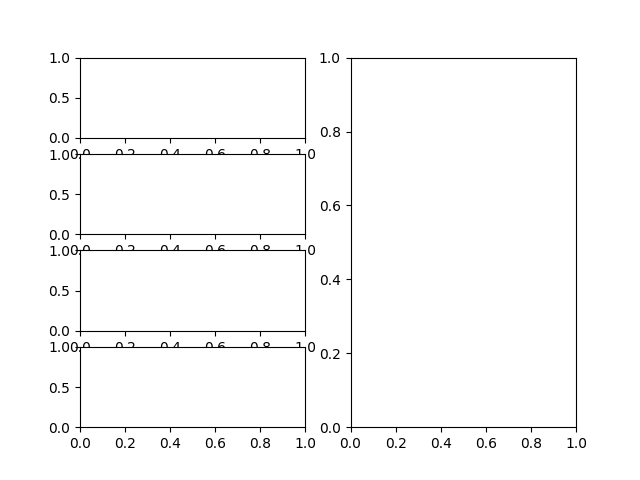

In [37]:
# Initializing plot
numDataPoints = len(t)
fig = plt.figure()
trajectory = fig.add_subplot(122)
velocity = fig.add_subplot(421)
acceleration = fig.add_subplot(423)
normal_acc = fig.add_subplot(425)
tan_acc = fig.add_subplot(427)

In [38]:
def animate_func(num):
    trajectory.clear()
    velocity.clear()
    acceleration.clear()
    tan_acc.clear()
    normal_acc.clear()

    # Plotting everything for ax graph
    trajectory.plot(dataSet[0, :num + 1], dataSet[1, :num + 1],
                    c='blue')  # graph
    trajectory.scatter(dataSet[0, num], dataSet[1, num],
                       c='blue', marker='o')  # current point
    trajectory.arrow(dataSet[0, num], dataSet[1, num], s1 * v_x[num], s1 * v_y[num], facecolor='red',
                     length_includes_head=True, head_width=2, width=0.4)  # velocity vector
    trajectory.arrow(dataSet[0, num], dataSet[1, num], s2 * a_x[num], s2 * a_y[num], facecolor='purple',
                     length_includes_head=True, head_width=1, width=0.4)  # acceleration vector
    trajectory.arrow(dataSet[0, num], dataSet[1, num], s2 * norm_a_x[num], s2 * norm_a_y[num], facecolor='green',
                     length_includes_head=True, head_width=1, width=0.4)  # normal acceleration vector
    trajectory.arrow(dataSet[0, num], dataSet[1, num], s1 * tan_a_x[num], s1 * tan_a_y[num], facecolor='black',
                     length_includes_head=True, head_width=1, width=0.4)  # tangential acceleration vector
    trajectory.plot(dataSet[0, 0], dataSet[1, 0],
                    c='black', marker='o')  # initial point
    trajectory.set_xlim([-20, 20])  # axes limits
    trajectory.set_ylim([0, 130])

    # Specification of graph notation
    trajectory.add_patch(pltp.Rectangle((17, 125), 1, 3, color='blue'))
    trajectory.text(4.5, 125, 'trajectory')
    trajectory.add_patch(pltp.Rectangle((17, 120), 1, 3, color='red'))
    trajectory.text(7, 120, 'velocity')
    trajectory.add_patch(pltp.Rectangle((17, 115), 1, 3, color='purple'))
    trajectory.text(1, 115, 'acceleration')
    trajectory.add_patch(pltp.Rectangle((17, 110), 1, 3, color='green'))
    trajectory.text(-8, 110, 'normal acceleration')
    trajectory.add_patch(pltp.Rectangle((17, 105), 1, 3, color='black'))
    trajectory.text(-12, 105, 'tangential acceleration')

    # Plotting everything for velocity graph
    velocity.plot(t[:num + 1], dataSet[2, :num + 1], c='grey')  # graph
    velocity.scatter(t[num], dataSet[2, num],
                     c='grey', marker='o')  # current point
    velocity.plot(t[0], dataSet[2, 0],
                  c='black', marker='o')  # initial point
    velocity.set_xlim([-6, 6])  # axes limits
    velocity.set_ylim([0, 50])
    velocity.text(-5.8, 1.5, 'v = ' + str(np.round(dataSet[2, num], decimals=2)) + '\nVelocity')  # graph title
    velocity.set_xlabel('t')
    velocity.set_ylabel('v(t)')

    # Plotting everything for acceleration graph
    acceleration.plot(t[:num + 1], dataSet[3, :num + 1], c='grey')  # graph
    acceleration.scatter(t[num], dataSet[3, num],
                         c='grey', marker='o')  # current point
    acceleration.plot(t[0], dataSet[3, 0],
                      c='black', marker='o')  # initial point
    acceleration.set_xlim([-6, 6])  # axes limits
    acceleration.set_ylim([0, 10])
    acceleration.text(-5.8, 1.5, 'a = ' + str(np.round(dataSet[3, num], decimals=2)) + '\nAcceleration')  # graph title
    acceleration.set_xlabel('t')
    acceleration.set_ylabel('a(t)')

    # Plotting everything for normal acceleration graph
    normal_acc.plot(t[:num + 1], dataSet[4, :num + 1], c='grey')  # graph
    normal_acc.scatter(t[num], dataSet[4, num],
                       c='grey', marker='o')  # current point
    normal_acc.plot(t[0], dataSet[4, 0],
                    c='black', marker='o')  # initial point
    normal_acc.set_xlim([-6, 6])  # axes limits
    normal_acc.set_ylim([0, 10])
    normal_acc.text(-5.8, 6.5, 'norm_a = ' + str(np.round(dataSet[4, num], decimals=2)) + '\nNormal acceleration')
    # graph title
    normal_acc.set_xlabel('t')
    normal_acc.set_ylabel('norm_a(t)')

    # Plotting everything for tangential acceleration graph
    tan_acc.plot(t[:num + 1], dataSet[5, :num + 1], c='grey')  # graph
    tan_acc.scatter(t[num], dataSet[5, num],
                    c='grey', marker='o')  # current point
    tan_acc.plot(t[0], dataSet[5, 0],
                 c='black', marker='o')  # initial point
    tan_acc.set_xlim([-6, 6])  # axes limits
    tan_acc.set_ylim([0, 10])
    tan_acc.text(-5.8, 1.5, 'tan_a = ' + str(np.round(dataSet[5, num], decimals=2)) + '\nTangential acceleration')
    # graph title
    tan_acc.set_xlabel('t')
    tan_acc.set_ylabel('tan_a(t)')

    # Graph title + timer + change in coordinates + curvature
    trajectory.set_title('ax \nTime = ' + str(np.round(t[num], decimals=2)) + ' sec'
                         + '\n (x, y) = (' + str(np.round(dataSet[0, num], decimals=2)) + ', ' +
                         str(np.round(dataSet[1, num], decimals=2)) + ')' +
                         '\n Curvature(κ) = ' + str(np.round(k[num], decimals=5)))
    trajectory.set_xlabel('x')
    trajectory.set_ylabel('y')

In [39]:
# Saving animation
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,
                                   frames=numDataPoints)

writergif = animation.PillowWriter(fps=60)
line_ani.save("task1.gif", dpi=300, writer=writergif)
# Closing all unclosed plots
plt.close('all')

# Task 2

In [40]:
# Given constants
OA = OP = 25
AC = 20
AB = 80
w = 1

In [41]:
# Parameters for simulation
t = np.linspace(0, 2 * np.pi, 100)
a = Symbol('a')

In [42]:
# Points of the initial position
O = array([0, 0])
P = array([0, OP])
B_i = array([-AB * np.sin(pi / 3), OP - AB * np.cos(pi / 3)])

In [43]:
# Obtained trajectories, velocities and accelerations
A = OA * Point([-sp.sin(a), sp.cos(a)])
B = Ellipse(A, AB, AB).intersection(Line(Point(P), Point(B_i)))[0]
C = A + AC / AB * (B - A)
points_sympy = [[A[0], A[1]], [B[0], B[1]], [C[0], C[1]]]
velocities_sympy = [[sp.diff(i[0]), sp.diff(i[1])] for i in points_sympy]
accelerations_sympy = [[sp.diff(i[0]), sp.diff(i[1])] for i in velocities_sympy]

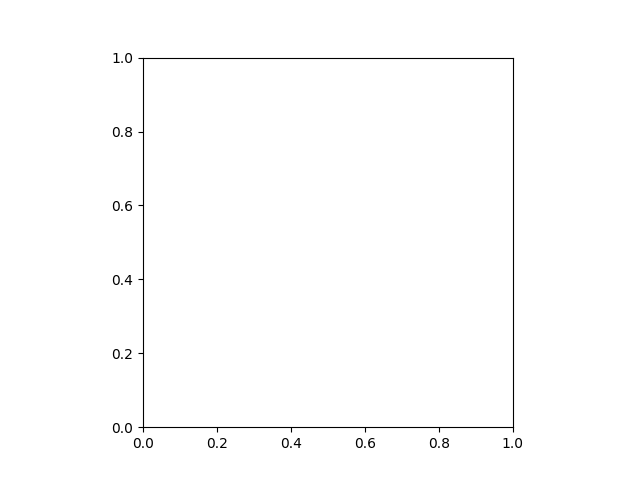

In [44]:
# Plot settings
fig, ax = plt.subplots()
ax.set_aspect("equal")

In [45]:
# Animation
def animate_func(frame):
    # Substitute frame into values introduced by sympy
    points = [[float(i[0].subs(a, frame).evalf()), float(i[1].subs(a, frame).evalf())]
              for i in points_sympy]
    velocities = [[float(i[0].subs(a, frame).evalf()), float(i[1].subs(a, frame).evalf())]
                  for i in velocities_sympy]
    accelerations = [[float(i[0].subs(a, frame).evalf()), float(i[1].subs(a, frame).evalf())]
                     for i in accelerations_sympy]
    tan_a = [np.array(velocities[i]) * (np.dot(accelerations[i], velocities[i]) / np.linalg.norm(velocities[i]) ** 2)
             for i in range(3)]
    norm_a = [np.asarray(accelerations[i]) - np.asarray(tan_a[i]) for i in range(3)]

    ax.clear()
    ax.set_xlim(-130, 130)
    ax.set_ylim(-130, 130)
    plt.title('Simulation of Task 2')
    ax.add_patch(pltp.Rectangle((points[1][0] - 10, points[1][1] - 5), 20, 10, angle=30, rotation_point='center',
                                color='grey'))

    # All meaningful points
    for i in [points[0], points[1], points[2], O, P, B_i]:
        plt.plot(i[0], i[1], markersize=3, markeredgecolor="black", markerfacecolor="black")

    # All lines
    plt.plot([P[0], points[1][0]], [P[1], points[1][1]], linestyle="dashed", linewidth=0.7, color="blue"),
    plt.plot([P[0], O[0]], [P[1], O[1]], linestyle="dashed", linewidth=0.7, color="blue"),
    plt.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], linewidth=0.7, color="blue"),
    plt.plot([O[0], points[0][0]], [O[1], points[0][1]], linewidth=0.7, color="blue")

    # Points names
    ax.text(points[0][0], points[0][1] + 3, 'A', fontsize=10)
    ax.text(points[1][0], points[1][1] + 3, 'B', fontsize=10)
    ax.text(points[2][0], points[2][1] + 3, 'C', fontsize=10)
    ax.text(O[0], O[1] + 3, 'O', fontsize=10)
    ax.text(P[0], P[1] + 3, 'P', fontsize=10)
    ax.text(B_i[0], B_i[1] + 3, '$B_i$', fontsize=10)

    # Velocity vectors
    plt.quiver([points[0][0]], [points[0][1]], [velocities[0][0]], [velocities[0][1]],
               color="red", scale=1, scale_units='xy')
    plt.quiver([points[1][0]], [points[1][1]], [velocities[1][0]], [velocities[1][1]],
               color="red", scale=1, scale_units='xy')
    plt.quiver([points[2][0]], [points[2][1]], [velocities[2][0]], [velocities[2][1]],
               color="red", scale=1, scale_units='xy')

    # Total acceleration vectors
    plt.quiver([points[0][0]], [points[0][1]], [accelerations[0][0]], [accelerations[0][1]],
               color="purple", scale=1, scale_units='xy')
    plt.quiver([points[1][0]], [points[1][1]], [accelerations[1][0]], [accelerations[1][1]],
               color="purple", scale=1, scale_units='xy')
    plt.quiver([points[2][0]], [points[2][1]], [accelerations[2][0]], [accelerations[2][1]],
               color="purple", scale=1, scale_units='xy')

    # Normal acceleration vectors
    plt.quiver([points[0][0]], [points[0][1]], [norm_a[0][0]], [norm_a[0][1]],
               color="green", scale=1, scale_units='xy')
    plt.quiver([points[2][0]], [points[2][1]], [norm_a[2][0]], [norm_a[2][1]],
               color="green", scale=1, scale_units='xy')

    # Tangential acceleration vectors
    plt.quiver([points[0][0]], [points[0][1]], [tan_a[0][0]], [tan_a[0][1]],
               color="black", scale=1, scale_units='xy')
    plt.quiver([points[1][0]], [points[1][1]], [tan_a[1][0]], [tan_a[1][1]],
               color="black", scale=1, scale_units='xy')
    plt.quiver([points[2][0]], [points[2][1]], [tan_a[2][0]], [tan_a[2][1]],
               color="black", scale=1, scale_units='xy')

    # Specification of graph notation
    ax.add_patch(pltp.Rectangle((50, 122), 6, 3, color='blue'))
    ax.text(60, 122, 'trajectory')
    ax.add_patch(pltp.Rectangle((50, 115), 6, 3, color='red'))
    ax.text(60, 115, 'velocity')
    ax.add_patch(pltp.Rectangle((50, 108), 6, 3, color='purple'))
    ax.text(60, 108, 'acceleration')
    ax.add_patch(pltp.Rectangle((50, 101), 6, 3, color='green'))
    ax.text(60, 101, 'normal acceleration')
    ax.add_patch(pltp.Rectangle((50, 94), 6, 3, color='black'))
    ax.text(60, 94, 'tangential acceleration')

In [46]:
anim = FuncAnimation(fig, animate_func, frames=t)
# Saving animation
anim.save('task2.gif', dpi=300, writer=PillowWriter(fps=60))
# Closing all unclosed plots
plt.close('all')